# The modelr API

Some small demos of the modelr API, hurriedly compiled. 

First, the usual preliminaries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

And some less usual ones.

In [33]:
from PIL import Image
from io import BytesIO
from base64 import b64decode

In [2]:
import requests

 Let's build the request programmatically. We'll use the `requests` library, because it's nicer to use than `urllib2`. 

In [9]:
url = 'https://www.modelr.org/plot.json'

params = { 'script': 'wedge_spatial.py',
           'theta': 0,
           'f': 25,
           'colourmap': 'Greys',
           'opacity': 0.5,
           'tslice': 0.15,
           'scale': '1.0,99',
           'base1': 'variable-density',
           'Rock0': '3000.0,1600.0,2500.0,50.0,50.0,50.0',
           'Rock1': '2770.0,1780.0,2185.0,50.0,50.0,50.0',
           'Rock2': '3000.0,1600.0,2500.0,50.0,50.0,50.0',
           'type': "scenario"
         }

In [11]:
r = requests.get(url, params, verify=False)

/Users/matt/anaconda/envs/python3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


In [32]:
idata = b64decode(r.json()['data'])
i = Image.open(BytesIO(idata))

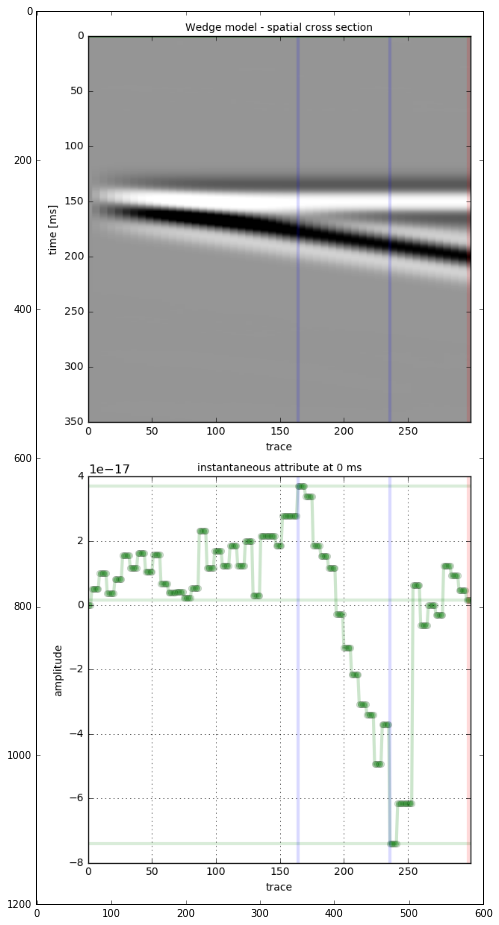

In [35]:
plt.figure(figsize=(8,18))
plt.imshow(i)
plt.show()

## Model building

The model-building URL is displayed in modelr, on the page https://www.modelr.io/model_builder (subscription only).

Here's an example of a URL call againt the model-building endpoint:

https://www.modelr.org/plot.json?script=slab_builder.py&interface_depth=80&x_samples=350&margin=50&left=0%2C40&right=30%2C130&layers=3&type=model_builder

This URL returns a JSON containing only a base64-encoded PNG — the model of the earth.

Let's look at some actual code.

In [36]:
url = 'https://www.modelr.org/plot.json'

params = { 'script': 'slab_builder.py',
           'interface_depth': 80,
           'x_samples': 350,
           'margin': 50,
           'left': '0,40',
           'right': '30,130',
           'layers': 3,
           'type': "model_builder"
         }

In [48]:
r = requests.get(url, params, verify=False)

/Users/matt/anaconda/envs/python3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:838: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/security.html
  InsecureRequestWarning)


In [41]:
idata = b64decode(r.json()['data'])

In [42]:
i = Image.open(BytesIO(idata))

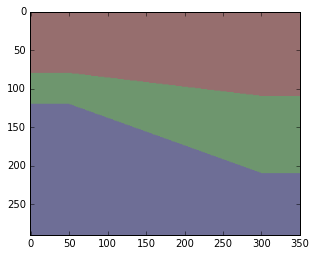

In [43]:
plt.imshow(i)
plt.show()

## Forward model

Now let's try to model this.

In [44]:
time   = range(0,99)
traces = range(1,350)
freqs  = range(10,100)

data = r.json()['data']

url_fm = 'https://www.modelr.org/forward_model.json'

In [46]:
p = {
      'data': data,
      'metadata':{'time': time,
      'trace': traces,
      'f': freqs}
    }

Actually... I don't think there's an easy way to do this right now.

We really need to be able to do the following:

- Make a 2D or 3D wedge model
- Send that model back with some seismic parameters and get a synthetic back
- Get the synthetic, or part of it, as a SEG-Y
